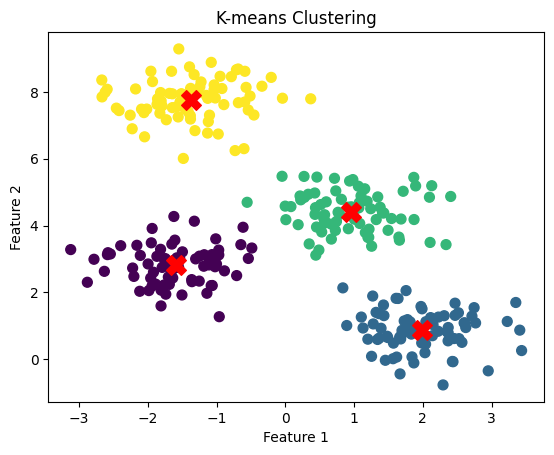

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        """
        Initialize the KMeans class with the number of clusters,
        maximum number of iterations, and tolerance for convergence.

        Parameters:
        n_clusters (int): Number of clusters to form.
        max_iter (int): Maximum number of iterations of the k-means algorithm.
        tol (float): Tolerance to declare convergence.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.labels = None  # Initialize labels attribute

    def fit(self, X):
        """
        Compute k-means clustering.

        Parameters:
        X (array-like or sparse matrix): The input data array with shape (n_samples, n_features).
        """
        np.random.seed(42)  # For reproducibility
        random_indices = np.random.permutation(X.shape[0])
        self.centroids = X[random_indices[:self.n_clusters]]

        for i in range(self.max_iter):
            self.labels = self._assign_labels(X)
            new_centroids = self._calculate_centroids(X)

            # Check for convergence
            if np.all(np.abs(self.centroids - new_centroids) <= self.tol):
                break
            self.centroids = new_centroids

    def _assign_labels(self, X):
        """
        Assign labels to each data point based on the nearest centroid.

        Parameters:
        X (array-like or sparse matrix): The input data array with shape (n_samples, n_features).

        Returns:
        labels (array): Array of shape (n_samples,) with the index of the nearest centroid for each data point.
        """
        distances = np.zeros((self.n_clusters, X.shape[0]))
        for i, centroid in enumerate(self.centroids):
            difference = X - centroid
            squared_difference = difference ** 2
            sum_squared_difference = squared_difference.sum(axis=1)
            euclidean_distance = np.sqrt(sum_squared_difference)
            distances[i] = euclidean_distance

        labels = np.argmin(distances, axis=0)
        return labels

    def _calculate_centroids(self, X):
        """
        Calculate new centroids based on the current assignments of data points to clusters.

        Parameters:
        X (array-like or sparse matrix): The input data array with shape (n_samples, n_features).

        Returns:
        new_centroids (array): Array of shape (n_clusters, n_features) with the new centroids.
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            # Filter data points assigned to cluster k
            cluster_points = X[self.labels == k]

            # Calculate the mean of these points
            if len(cluster_points) > 0:  # Avoid division by zero
                new_centroids[k] = cluster_points.mean(axis=0)
        return new_centroids

    def predict(self, X):
        """
        Assign labels to new data points based on the nearest centroid.

        Parameters:
        X (array-like or sparse matrix): The input data array with shape (n_samples, n_features).

        Returns:
        labels (array): Array of shape (n_samples,) with the index of the nearest centroid for each data point.
        """
        return self._assign_labels(X)

    def inertia(self, X):
        """
        Calculate the sum of squared distances from each data point to its assigned centroid.

        Returns:
        inertia (float): Sum of squared distances.
        """
        return sum(((self.centroids[self.labels] - X)**2).sum(axis=1))


# Test cases and graphical outputs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create a KMeans instance
kmeans = KMeans(n_clusters=4)

# Fit the model
kmeans.fit(X)

# Predict the cluster labels for the input data
y_kmeans = kmeans.predict(X)

# Plot the data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()